# One vs all heat map

## Imports

In [1]:
import json
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
RESULTS_PATH='../../data/baseline/results'

In [3]:
native_metrics_dict = {}
# Get test accuracy for the LLM the classifier has trained on
for filename in os.listdir(RESULTS_PATH):
    if not filename.endswith('test_metrics.json') or filename.startswith('one_vs_each'):
        continue
    
    filepath = os.path.join(RESULTS_PATH, filename)
    with open(filepath, 'r') as file:
        data = json.load(file)
        # Use the filename without the .json extension as the key
        key = os.path.splitext(filename)[0].split('_')[0]
        native_metrics_dict[key] = data

data = None
with open(f'{RESULTS_PATH}/one_vs_each.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
native_metrics_dict.keys()

dict_keys(['alpaca-7b', 'bigscience-bloomz-7b1', 'chavinlo-alpaca-13b', 'gemini-pro', 'gpt-3.5-turbo-0125', 'gpt-4-turbo-preview', 'meta-llama-llama-2-70b-chat-hf', 'meta-llama-llama-2-7b-chat-hf', 'mistralai-mistral-7b-instruct-v0.2', 'mistralai-mixtral-8x7b-instruct-v0.1', 'qwen-qwen1.5-72b-chat-8bit', 'text-bison-002', 'vicgalle-gpt2-open-instruct-v1'])

In [5]:
models = ['gemini-pro', 'bigscience-bloomz-7b1', 'gpt-3.5-turbo-0125']


## Plot heat map

In [11]:
# 14 LLMs 
# 14x15 matrix; each row displays the accuracy of a classifier trained on one LLM and tested on the other LLM test sets, as well as the human test set
# The LLMs should be sorted for each row, so we get a classifier trained on LLM X's performance on X's test data at the diagonal square 
# (the diagonal goes from (1,1) to (14,14), as we don't train a classifier on human data only)
def plot_heat_map(data, native_metrics_dict, title, use_full_test_set=True, metric='test_acc'):
    test_set_attribute = 'vs_full_test_set' if use_full_test_set else 'vs_30_percent_test_set'
    heatmap_data = []

    for item in data:
        base_model = item['base_model']
        if base_model not in models:
            continue
        results = {}
        results['base_model'] = base_model
        
        v = native_metrics_dict[base_model][metric]
        if metric == 'test_acc':
            v = float("{:.2f}".format(v / 100))
        results[base_model] = v
        
        for result in item['results_against_all_llms']:
            for model_name, model_data in result.items():
                if model_name not in models:
                    continue
                v = model_data[test_set_attribute][metric]
                if metric == 'test_acc':
                   v = float("{:.2f}".format(v / 100))
                results[model_name] = v
        
        heatmap_data.append(results)
    
    # Create DataFrame
    df = pd.DataFrame(heatmap_data)
    df.set_index('base_model', inplace=True)
    df = df.sort_index(axis=1)

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(df, annot=True, cmap='viridis_r', fmt=".2f", cbar_kws={'label': metric}, annot_kws={"size": 24}, vmin=0, vmax=1)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation=0)
    plt.title(title)
    plt.show()

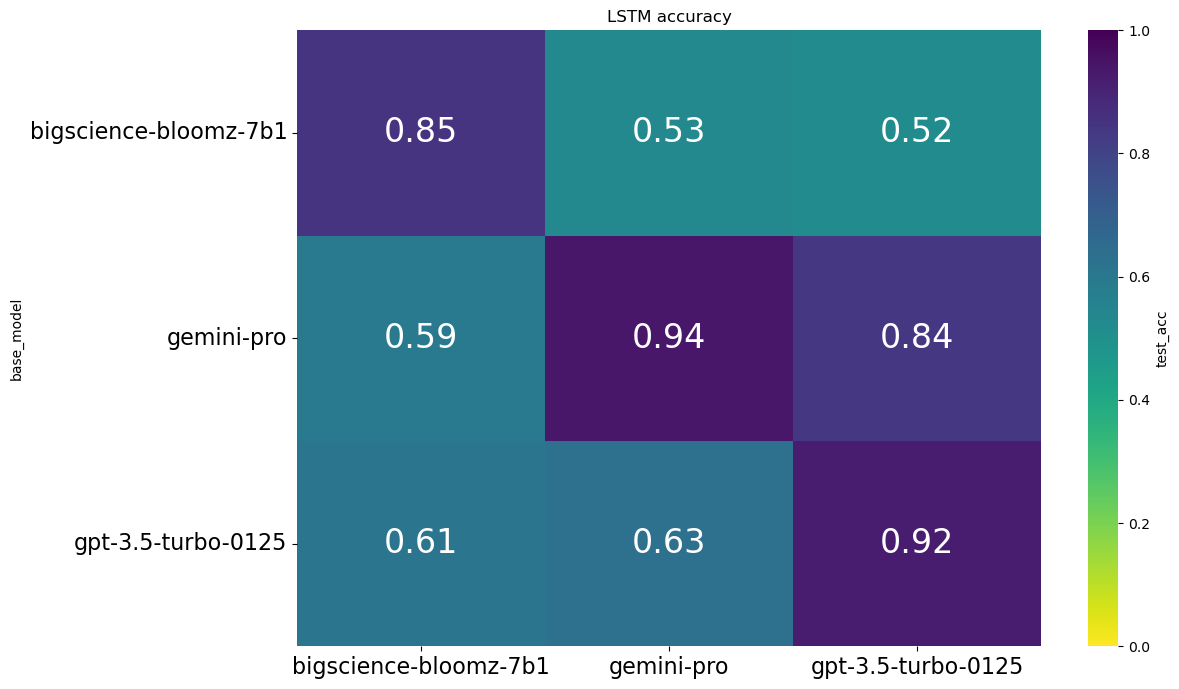

In [12]:
plot_heat_map(data, native_metrics_dict, 'LSTM accuracy', use_full_test_set=False, metric='test_acc')

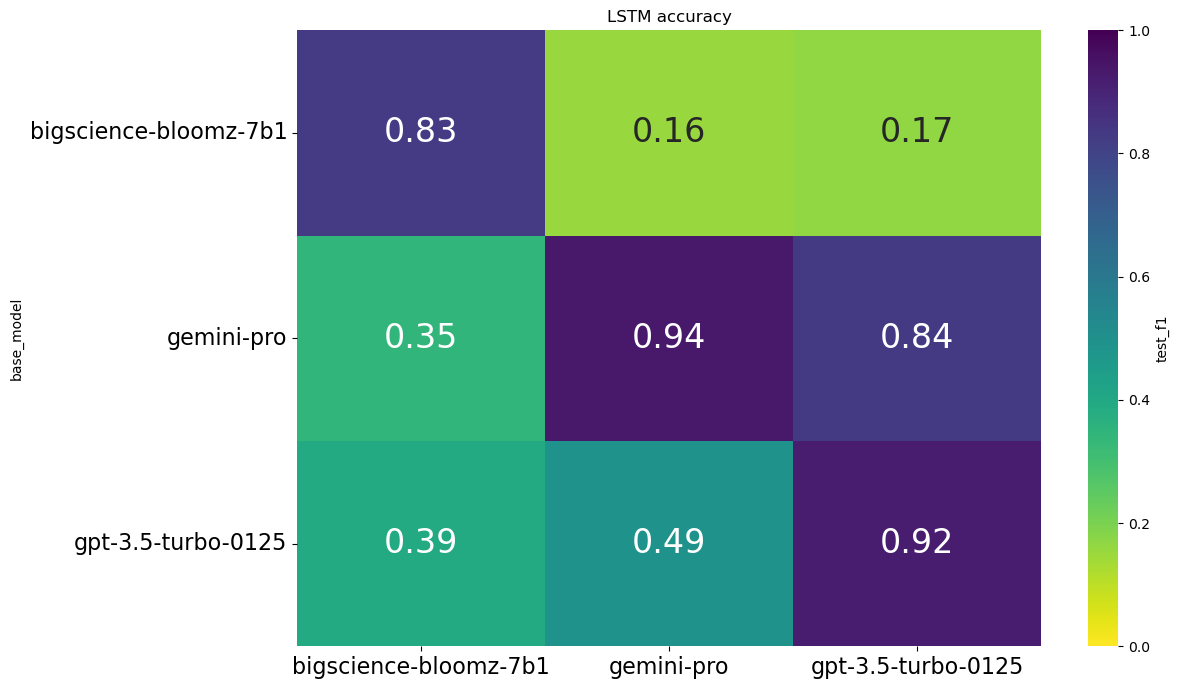

In [20]:
plot_heat_map(data, native_metrics_dict, 'LSTM accuracy', use_full_test_set=True, metric='test_f1')

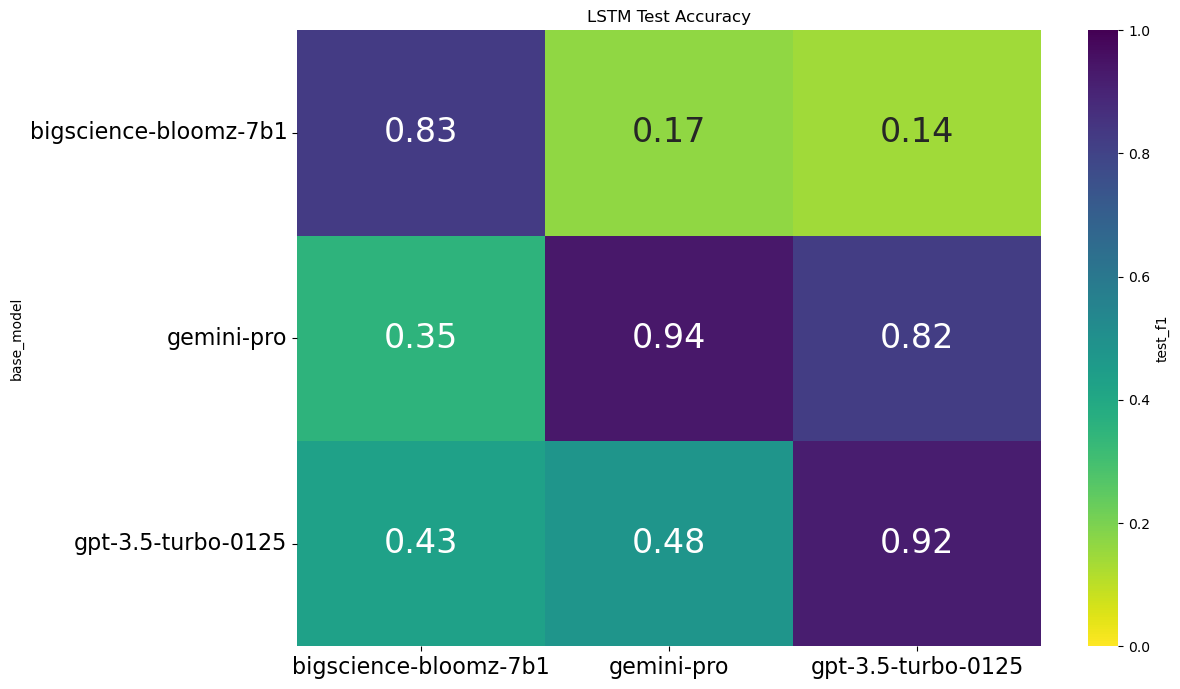

In [21]:
plot_heat_map(data, native_metrics_dict, 'LSTM Test Accuracy', use_full_test_set=False, metric='test_f1')

In [72]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=False, metric='test_acc')

TypeError: plot_heat_map() missing 1 required positional argument: 'title'

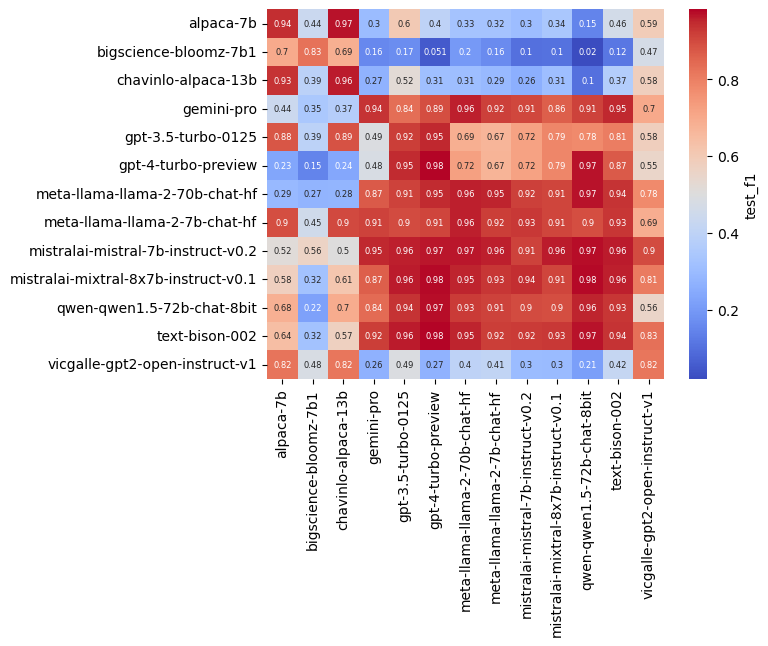

In [ ]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=True, metric='test_f1')